In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

mapping = {'a': [1,0,0,0,0,0,0,0,0,0],
           'b': [0,1,0,0,0,0,0,0,0,0],
           'c': [0,0,1,0,0,0,0,0,0,0],
           'd': [0,0,0,1,0,0,0,0,0,0],
           'e': [0,0,0,0,1,0,0,0,0,0],
           'f': [0,0,0,0,0,1,0,0,0,0],
           'g': [0,0,0,0,0,0,1,0,0,0],
           'h': [0,0,0,0,0,0,0,1,0,0],
           'i': [0,0,0,0,0,0,0,0,1,0],
         'none':[0,0,0,0,0,0,0,0,0,1]}



data = pandas.read_csv('./Data/Data.csv')

data


,_id,word,hand[0][0],hand[0][1],hand[0][2],hand[0][3],hand[0][4],hand[1][0],hand[1][1],hand[1][2],...,hand[60][0],hand[60][1],hand[60][2],hand[60][3],hand[60][4],hand[61][0],hand[61][1],hand[61][2],hand[61][3],hand[61][4]
0,656e54ff24eed63bcf366d72,a,348.0,221.0,1019.0,619.0,1019.5,99.5,81.0,490.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,656e550424eed63bcf366d73,a,206.5,178.0,1018.0,500.5,1018.0,81.0,74.5,326.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,656e550b24eed63bcf366d74,a,829.0,1022.5,1020.0,720.0,1020.5,203.0,214.0,1018.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656e550e24eed63bcf366d75,a,127.5,63.0,127.0,277.5,1015.5,50.5,35.0,89.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,656e551324eed63bcf366d76,a,84.5,65.5,170.5,252.0,1015.0,49.5,41.0,81.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,658f011987fcdffec11422d7,none,1021.5,839.5,918.5,964.5,1022.0,1018.0,426.5,837.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,658f012087fcdffec11422d8,none,1022.0,1022.0,883.5,905.0,1021.5,1019.0,776.5,885.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,658f012587fcdffec11422d9,none,1018.5,598.0,913.5,870.0,1018.0,1015.5,199.0,788.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,658f012b87fcdffec11422da,none,1014.0,300.0,714.0,931.5,1014.5,1014.0,162.0,629.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
words = data['word']
y = data['word']

words



y

0         a
1         a
2         a
3         a
4         a
       ... 
995    none
996    none
997    none
998    none
999    none
Name: word, Length: 1000, dtype: object

In [6]:

x = data.iloc[:,2:]
x

,hand[0][0],hand[0][1],hand[0][2],hand[0][3],hand[0][4],hand[1][0],hand[1][1],hand[1][2],hand[1][3],hand[1][4],...,hand[60][0],hand[60][1],hand[60][2],hand[60][3],hand[60][4],hand[61][0],hand[61][1],hand[61][2],hand[61][3],hand[61][4]
0,348.0,221.0,1019.0,619.0,1019.5,99.5,81.0,490.5,361.0,1016.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,206.5,178.0,1018.0,500.5,1018.0,81.0,74.5,326.0,203.0,1015.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,829.0,1022.5,1020.0,720.0,1020.5,203.0,214.0,1018.0,591.0,1019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,127.5,63.0,127.0,277.5,1015.5,50.5,35.0,89.5,125.5,1015.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.5,65.5,170.5,252.0,1015.0,49.5,41.0,81.5,129.0,1014.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1021.5,839.5,918.5,964.5,1022.0,1018.0,426.5,837.0,925.0,1017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,1022.0,1022.0,883.5,905.0,1021.5,1019.0,776.5,885.0,902.5,1020.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,1018.5,598.0,913.5,870.0,1018.0,1015.5,199.0,788.0,823.5,1015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,1014.0,300.0,714.0,931.5,1014.5,1014.0,162.0,629.0,893.0,1014.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

data.iloc[:,2:]


,hand[0][0],hand[0][1],hand[0][2],hand[0][3],hand[0][4],hand[1][0],hand[1][1],hand[1][2],hand[1][3],hand[1][4],...,hand[60][0],hand[60][1],hand[60][2],hand[60][3],hand[60][4],hand[61][0],hand[61][1],hand[61][2],hand[61][3],hand[61][4]
0,348.0,221.0,1019.0,619.0,1019.5,99.5,81.0,490.5,361.0,1016.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,206.5,178.0,1018.0,500.5,1018.0,81.0,74.5,326.0,203.0,1015.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,829.0,1022.5,1020.0,720.0,1020.5,203.0,214.0,1018.0,591.0,1019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,127.5,63.0,127.0,277.5,1015.5,50.5,35.0,89.5,125.5,1015.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.5,65.5,170.5,252.0,1015.0,49.5,41.0,81.5,129.0,1014.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1021.5,839.5,918.5,964.5,1022.0,1018.0,426.5,837.0,925.0,1017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,1022.0,1022.0,883.5,905.0,1021.5,1019.0,776.5,885.0,902.5,1020.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,1018.5,598.0,913.5,870.0,1018.0,1015.5,199.0,788.0,823.5,1015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,1014.0,300.0,714.0,931.5,1014.5,1014.0,162.0,629.0,893.0,1014.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.shape

data[0][0]

# p.append(309)
# p.append(309)
# len(p)
# average = 0


# for i in range(len(p)):
#   p[i] = p[i]//5
# for i in range(len(p)):
#   average += p[i]
# average /= 900
# std_deviation = np.std(p)
# print(std_deviation, " ", average)


KeyError: 0

In [11]:
y = np.concatenate([[mapping[i] for i in y]])
y


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [12]:
print(y.shape)

(1000, 10)


In [13]:
x = x.to_numpy()

In [14]:
x = x[:,:45].reshape(1000,5,9)
x.size

45000

In [15]:
x = x.transpose(0, 2, 1)
x = np.nan_to_num(x)
x

array([[[ 348. , 1016.5,  110.5,   74. ,  183.5],
        [ 221. ,   45.5, 1015.5,  122. ,  732. ],
        [1019. ,   44.5,   31. , 1015.5,  584.5],
        ...,
        [  81. ,   32.5, 1015. ,  208. , 1019.5],
        [ 490.5,   34.5,   34.5,  995.5, 1000.5],
        [ 361. ,   68.5,   37. ,  163.5, 1021.5]],

       [[ 206.5, 1015.5,  109. ,   66. ,  152.5],
        [ 178. ,   39.5, 1014.5,  129. ,  236. ],
        [1018. ,   47.5,   31. ,  783. ,  253.5],
        ...,
        [  74.5,   31.5, 1014.5,  174. ,  669. ],
        [ 326. ,   39.5,   32.5,  750. ,  696.5],
        [ 203. ,   63. ,   39. ,   78.5, 1018. ]],

       [[ 829. , 1019. ,  127.5,   69. ,   40. ],
        [1022.5,   98. ,  789. ,  113.5,   69.5],
        [1020. ,   98.5,   33.5, 1015. ,  133. ],
        ...,
        [ 214. ,   40.5,  912.5,  119. ,   70.5],
        [1018. ,   51. ,   32. , 1015. ,  144. ],
        [ 591. ,   96. ,   41.5,   32. , 1014.5]],

       ...,

       [[1018.5, 1015. ,  768.5,  527. ,  

In [16]:
x.shape


(1000, 9, 5)

In [17]:


encoder = models.Sequential([
    layers.SimpleRNN(64, return_sequences=True, input_shape=(None, 5)),
    layers.SimpleRNN(64)
])
encoder.summary()

decoder = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(64,)),
    layers.Dense(10, activation='softmax')
])
decoder.summary()


autoencoder = models.Sequential([
    encoder,
    decoder
])
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 64)          4480      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
Total params: 12736 (49.75 KB)
Trainable params: 12736 (49.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                

In [18]:
x.shape

(1000, 9, 5)

In [19]:
y.shape

(1000, 10)

In [20]:

batch_size = 64
epochs = 1000

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
history = autoencoder.fit(x_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, y_val))

autoencoder.evaluate(x_val, y_val)

Epoch 1/1000
13/13 [==============================] - 2s 33ms/step - loss: 0.0875 - accuracy: 0.2075 - val_loss: 0.0820 - val_accuracy: 0.3500
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0728 - accuracy: 0.4800 - val_loss: 0.0692 - val_accuracy: 0.4700
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0587 - accuracy: 0.5825 - val_loss: 0.0571 - val_accuracy: 0.6050
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0467 - accuracy: 0.7100 - val_loss: 0.0465 - val_accuracy: 0.6700
Epoch 5/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0362 - accuracy: 0.7638 - val_loss: 0.0379 - val_accuracy: 0.7350
Epoch 6/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0277 - accuracy: 0.8225 - val_loss: 0.0310 - val_accuracy: 0.8200
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0211 - accuracy: 0.8863 - val_loss: 0.0247 - val_accuracy: 0.8650
Epoch

KeyboardInterrupt: 

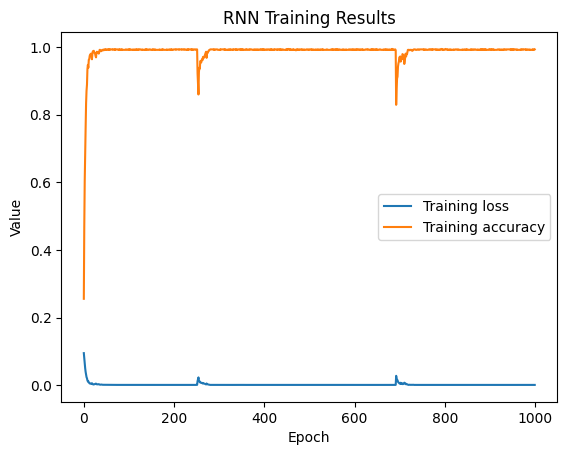

In [ ]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("RNN Training Results")
plt.legend()
plt.show()

In [ ]:
prediction_array

NameError: ignored

In [ ]:

min_val = 0
index = -1
for i in range(0,len(prediction_array)):
    if prediction_array[i] > min_val:
        min_val = prediction_array[i]
        index = i

print(prediction_array, "    ", index)

In [ ]:
autoencoder.predict(x[:1])


1/1 [==============================] - 0s 30ms/step


array([[8.7467182e-01, 2.6363975e-04, 4.9550671e-02, 3.2109339e-03,
        2.8106472e-02, 2.9162439e-03, 3.3222035e-02, 3.4205662e-03,
        4.6376819e-03]], dtype=float32)

In [ ]:
autoencoder.save('/content/EETrainedModel32_batchSize.keras')


In [ ]:
array = [[1,2],[1,2]]
array[0][0]

1

In [ ]:
array[:]

[[1, 2], [1, 2]]

In [ ]:
array[:,0]

TypeError: ignored